# 卷积神经网络知识


## 转置卷积
### 下采样

**转置卷积**（Transposed Convolution） 在语义分割或者对抗神经网络（GAN）中比较常见，其主要作用就是做上采样（UpSampling）。在有些地方转置卷积又被称作fractionally-strided convolution或者deconvolution，但deconvolution具有误导性，不建议使用。对于转置卷积需要注意的是：

- 转置卷积不是卷积的逆运算、不是逆运算、不是逆运算（重要的事情说三遍）
- 转置卷积也是卷积

### 卷积操作
首先回顾下普通卷积，下图以stride=1，padding=0，kernel_size=3为例，假设输入特征图大小是4x4的（假设输入输出都是单通道），通过卷积后得到的特征图大小为2x2。一般使用卷积的情况中，要么特征图变小（stride > 1），要么保持不变（stride = 1），当然也可以通过四周padding让特征图变大但没有意义。

![conv](images/deep_learning/卷积.gif)

当垂直步幅为$s_h$、水平步幅为$s_w$时，输出形状为:

$$\lfloor(n_h-k_h+2p_h)/s_h + 1\rfloor \times \lfloor(n_w-k_w+2p_w)/s_w\ + 1 \rfloor.$$

如果我们设置了$p_h=(k_h-1)/2$和$p_w=(k_w-1)/2$，则输出形状将简化为$\lfloor(n_h+s_h-1)/s_h\rfloor \times \lfloor(n_w+s_w-1)/s_w\rfloor$。
更进一步，如果输入的高度和宽度可以被垂直和水平步幅整除，则输出形状将为$(n_h/s_h) \times (n_w/s_w)$。


### 转置卷积操作
转置卷积刚刚说了，主要作用就是起到上采样的作用。但转置卷积不是卷积的逆运算（一般卷积操作是不可逆的），它只能恢复到原来的大小（shape）数值与原来不同。转置卷积的运算步骤可以归为以下几步：

- 在输入特征图元素间填充$s-1$行、列0（其中s表示转置卷积的步距）
- 在输入特征图四周填充$k-p-1$行、列0（其中k表示转置卷积的kernel_size大小，p为转置卷积的padding，注意这里的padding和卷积操作中有些不同）
- 将卷积核参数上下、左右翻转
- 做正常卷积运算（填充0，步距1）

下面假设输入的特征图大小为2x2（假设输入输出都为单通道），通过转置卷积后得到4x4大小的特征图。这里使用的转置卷积核大小为k=3，stride=1，padding=0的情况（忽略偏执bias）。

- 首先在元素间填充s-1=0行、列0（等于0不用填充）
  $$ h_1 = h_{in} + (h_{in} - 1) \times (s - 1) $$
- 然后在特征图四周填充$k-p-1=2$行、$k-p-1=2$列0
  $$ h = 2 \times (k - p - 1) + h_1 $$
- 接着对卷积核参数进行上下、左右翻转
- 最后做正常卷积（填充0，步距1）
  $$ h_{out} = (h - k + 2 \times p_0) / s_1 + 1 $$

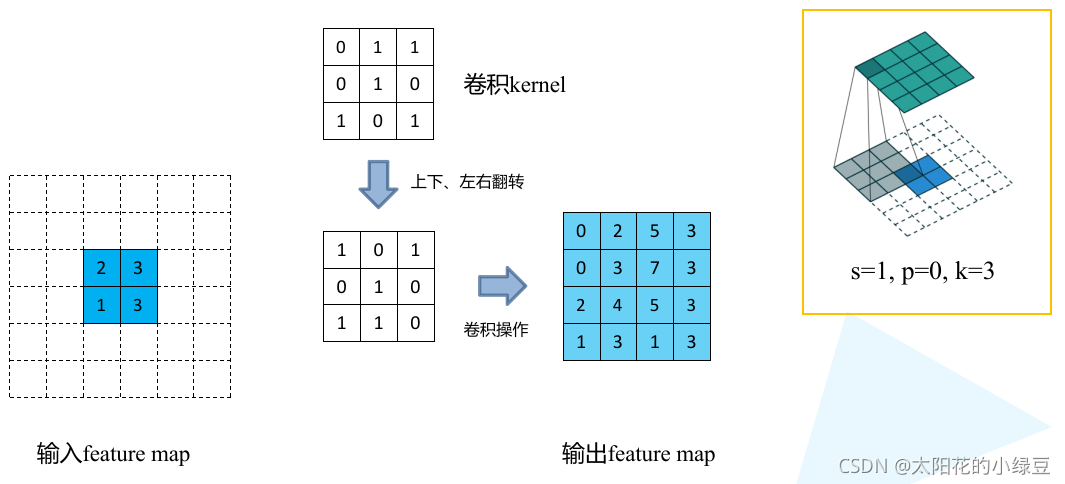

下图展示了转置卷积中不同s和p的情况：

![s=1, p=0, k=3](images/deep_learning/1.gif)
![s=2, p=0, k=3](images/deep_learning/2.gif)
![s=2, p=1, k=3](images/deep_learning/2.gif)

转置卷积操作后特征图的大小可以通过如下公式计算：

$$
H_{out} = (H_{in} - 1) \times s - 2p + k \\

$$

当$s=2,k=2,p=0$时，输出特征图的尺寸为输入特征图尺寸的2倍。